In [1]:
import pandas as pd


In [2]:
card=pd.read_csv('/content/CC GENERAL.csv')
print(card)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

In [18]:
print(card.head())


  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [17]:
print(card.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [36]:
from sklearn.cluster import KMeans


In [33]:
h = card.drop('CUST_ID', axis=1)
h.fillna(method='ffill', inplace=True)


In [34]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(h)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [35]:
cluster_labels = kmeans.labels_
h['Cluster'] = cluster_labels
print(h['Cluster'].value_counts())
print(kmeans.cluster_centers_)

Cluster
0    5184
4    2418
1     868
3     110
2      56
Name: count, dtype: int64
[[8.17543419e+02 8.73451617e-01 4.99705751e+02 2.40033315e+02
  2.59986795e+02 4.96588296e+02 4.52674947e-01 1.29713087e-01
  3.47844101e-01 1.12950039e-01 2.36375917e+00 9.44596681e+00
  2.18412528e+03 9.15715716e+02 5.17249375e+02 1.52202225e-01
  1.13948283e+01]
 [5.52846723e+03 9.61380919e-01 1.52478694e+03 9.36208297e+02
  5.88655685e+02 3.88019473e+03 4.71580251e-01 2.63342555e-01
  3.50477623e-01 3.32141441e-01 9.81127733e+00 2.14522440e+01
  1.09527670e+04 4.06556038e+03 1.93036214e+03 6.95312727e-02
  1.16697353e+01]
 [4.05814769e+03 9.88636375e-01 1.02737875e+03 1.18389464e+02
  9.08989286e+02 9.22757849e+02 4.71320321e-01 3.92315536e-02
  4.41152625e-01 1.05654714e-01 3.01785714e+00 1.86250000e+01
  4.26785714e+03 1.62493914e+03 2.27600316e+04 1.48808929e-03
  1.19107143e+01]
 [4.83575972e+03 9.14242418e-01 1.18188140e+04 8.43201936e+03
  3.38699464e+03 5.25019148e+03 7.70234145e-01 6.2445101

In [41]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt



In [37]:
h = card.drop('CUST_ID', axis=1)
h.fillna(method='ffill', inplace=True)

In [38]:
agglomerative_cluster = AgglomerativeClustering(n_clusters=5)
cluster_labels = agglomerative_cluster.fit_predict(h)
h['Cluster'] = cluster_labels
print(h['Cluster'].value_counts())
linked = linkage(h, 'ward')


Cluster
4    4504
3    2336
0    1680
1      93
2      23
Name: count, dtype: int64


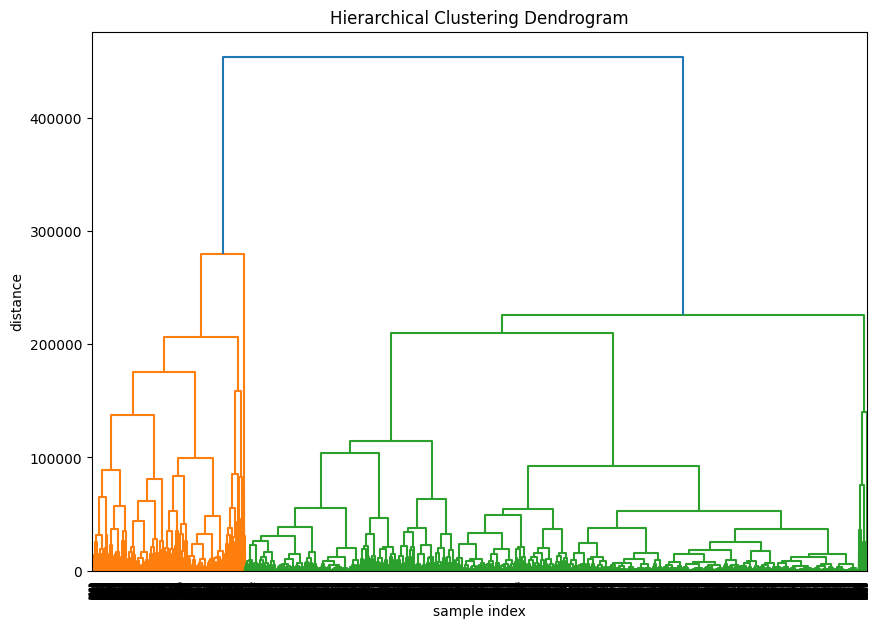

In [39]:
plt.figure(figsize=(10, 7))
dendrogram(linked,
 orientation='top', distance_sort='descending',
 show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()